## A basic example of use of *GISCO* vector features...

In [ ]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter nbextension enable --py --sys-prefix ipyleaflet

In [1]:
import happygisco
from happygisco import settings, base, tools, services, features

! missing FASTENERS package (https://pypi.org/project/fasteners/) <class 'ImportWarning'> !
! missing SIMPLEJSON package (https://pypi.python.org/pypi/simplejson/) <class 'ImportWarning'> !
! missing GOOGLEPLACES package (https://github.com/slimkrazy/python-google-places) !


One can already use the services to download datasets of interest:

In [ ]:
service = services.GISCOService()
r = service.nuts_response(source='BULK', year=2016, scale='60m')
print(r.dimensions)

In [ ]:
data = service.nuts_geometry(resp=r) 

Note the following error parsed _'!!! HTTPError: wrong request - 404 status ("Not Found") returned !!!'_

In [2]:
for unit in ("AT01","AT1"):
    print("===== requesting NUTS data for area %s ===============" % unit)
    nuts = features.NUTS(unit=unit)
    try:
        url = nuts.url
    except happygisco.happyError as e:
        print(e)
    else:
        print('* requested url is: %s' % url)
    try:
        geom = nuts.geometry
    except happygisco.happyError as e:
        print(e)
    else:
        print('* fetched geometry is: %s' % geom)
        print('* name of area is: %s' % nuts.name)
        print('* level of area is: %s' % nuts.level)        

===== requesting NUTS data for area AT01 ===============
* requested url is: https://ec.europa.eu/eurostat/cache/GISCO/distribution/v2/nuts/distribution/AT01-region-60m-4326-2013.geojson
!!! HTTPError: wrong request - 404 status ("Not Found") returned !!!
===== requesting NUTS data for area AT1 ===============
* requested url is: https://ec.europa.eu/eurostat/cache/GISCO/distribution/v2/nuts/distribution/AT1-region-60m-4326-2013.geojson
* fetched geometry is: {'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}, 'type': 'FeatureCollection', 'features': [{'geometry': {'type': 'Polygon', 'coordinates': [[[16.94, 48.617], [16.95, 48.536], [16.851, 48.439], [16.976, 48.172], [17.067, 48.119], [17.161, 48.007], [17.093, 47.708], [16.422, 47.665], [16.652, 47.623], [16.646, 47.447], [16.434, 47.353], [16.508, 47.001], [16.114, 46.869], [15.996, 46.835], [16.122, 46.991], [16.015, 47.367], [16.172, 47.422], [15.847, 47.568], [15.217, 47.796], [15.089, 47.741], [14.73

In [3]:
print(nuts.year)

2013


In [4]:
nuts.service.geom2dimension(nuts.geometry)

OrderedDict([('source', 'AT1'),
             ('proj', '4326'),
             ('vector', 'RG'),
             ('level', 1)])

In [5]:
nuts.service.url2dimension(nuts.url)

OrderedDict([('source', 'AT1'),
             ('year', 2013),
             ('proj', 4326),
             ('scale', '60m'),
             ('vector', 'RG'),
             ('level', 1),
             ('ifmt', 'geojson')])

In [6]:
nuts.unit, nuts._dimensions

('AT1',
 {'ifmt': 'geojson',
  'level': 1,
  'proj': 4326,
  'scale': '60m',
  'vector': 'RG',
  'year': 2013})

In [2]:
nuts = features.NUTS(unit=['AT11', 'AT12', 'AT13', 'AT21'],tile='osmec')
nuts.carto(_no_widget_=True)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [3]:
nuts.unit = nuts.unit + ['AT22', 'AT31', 'AT32', 'AT33', 'AT34']
nuts.carto()

In [2]:
nuts = features.NUTS(unit=['AT11', 'AT12', 'AT13', 'AT21', 'AT22', 'AT31', 'AT32', 'AT33', 'AT34'],tile='bmarble')
# nuts.load(unit='FR')

In [3]:
# import ipywidgets as ipyw
# nuts.mapping.Map
nuts.carto(_no_widget_=True)
# ipyw.VBox(nuts.carto())

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [8]:
units = nuts.service.nuts_info(info='UNITS', unit='AT', level=2)
print(units)

['AT11', 'AT12', 'AT13', 'AT21', 'AT22', 'AT31', 'AT32', 'AT33', 'AT34']


In [9]:
nuts.unit = units

In [10]:
nuts.geometry

[{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'},
   'type': 'name'},
  'features': [{'geometry': {'coordinates': [[[17.161, 48.007],
       [17.093, 47.708],
       [16.422, 47.665],
       [16.652, 47.623],
       [16.646, 47.447],
       [16.434, 47.353],
       [16.508, 47.001],
       [16.114, 46.869],
       [15.996, 46.835],
       [16.122, 46.991],
       [16.015, 47.367],
       [16.172, 47.422],
       [16.281, 47.455],
       [16.373, 47.642],
       [16.269, 47.796],
       [16.389, 47.882],
       [17.067, 48.119],
       [17.161, 48.007]]],
     'type': 'Polygon'},
    'id': 'AT11',
    'properties': {'CNTR_CODE': 'AT',
     'FID': 'AT11',
     'LEVL_CODE': 2,
     'NUTS_ID': 'AT11',
     'NUTS_NAME': 'Burgenland (AT)'},
    'type': 'Feature'}],
  'type': 'FeatureCollection'},
 {'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'},
   'type': 'name'},
  'features': [{'geometry': {'coordinates': [[[15.542, 48.908],
       [15.754, 48.852],
       [16.

In [21]:
nuts.load(unit='AT21')

{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[13.785, 46.944],
      [13.947, 46.941],
      [14.844, 47.048],
      [15.065, 46.652],
      [14.675, 46.451],
      [14.565, 46.372],
      [14.435, 46.443],
      [13.714, 46.523],
      [13.504, 46.566],
      [12.731, 46.634],
      [12.691, 46.657],
      [12.841, 46.861],
      [12.657, 47.1],
      [13.355, 47.097],
      [13.785, 46.944]]],
    'type': 'Polygon'},
   'id': 'AT21',
   'properties': {'CNTR_CODE': 'AT',
    'FID': 'AT21',
    'LEVL_CODE': 2,
    'NUTS_ID': 'AT21',
    'NUTS_NAME': 'Kärnten'},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

In [4]:
data = nuts.load(unit=['AT21', 'AT22'])

In [5]:
nuts.mapping.Map

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [5]:
import ipyleaflet as ipyl
import ipywidgets as ipyw
import json

In [8]:
nuts.load(unit=['AT21', 'AT22'])
nuts.load(unit='AT21')

{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[13.785, 46.944],
      [13.947, 46.941],
      [14.844, 47.048],
      [15.065, 46.652],
      [14.675, 46.451],
      [14.565, 46.372],
      [14.435, 46.443],
      [13.714, 46.523],
      [13.504, 46.566],
      [12.731, 46.634],
      [12.691, 46.657],
      [12.841, 46.861],
      [12.657, 47.1],
      [13.355, 47.097],
      [13.785, 46.944]]],
    'type': 'Polygon'},
   'id': 'AT21',
   'properties': {'CNTR_CODE': 'AT',
    'FID': 'AT21',
    'LEVL_CODE': 2,
    'NUTS_ID': 'AT21',
    'NUTS_NAME': 'Kärnten'},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

In [38]:
import geopandas
units = nuts.service.nuts_info(info='UNITS', unit='AT', level=2)
print(units)
data = nuts.load() 
data = service.nuts_geometry(source='NUTS', year=2013, scale='20m', vector='region')

crs = data[0]['crs']
gdf = geopandas.GeoDataFrame.from_features([d['features'][0] for d in data], crs=crs)
gdf.head()

,CNTR_CODE,FID,LEVL_CODE,NUTS_ID,NUTS_NAME,geometry
0,AT,AT32,2,AT32,Salzburg,"POLYGON ((13.586 47.475, 13.608 47.284, 13.864..."
1,AT,AT12,2,AT12,Niederösterreich,"POLYGON ((15.542 48.908, 15.754 48.852, 16.94 ..."
2,AT,AT34,2,AT34,Vorarlberg,"POLYGON ((10.178 47.27, 10.213 47.158, 10.145 ..."
3,AT,AT13,2,AT13,Wien,"POLYGON ((16.577 48.144, 16.182 48.171, 16.438..."
4,AT,AT22,2,AT22,Steiermark,"POLYGON ((16.172 47.422, 16.015 47.367, 16.122..."


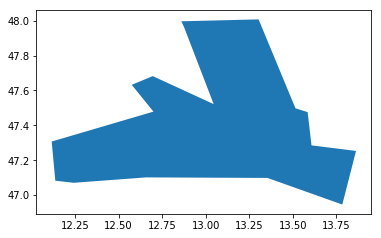

In [37]:
%matplotlib inline
gdf.plot()

In [39]:
service = services.GISCOService()
r = service.nuts_response(source='NUTS', year=[2013,2016], scale=['20m','60m'], vector='region')
#data = service.nuts_geometry(resp=r)
data = service.nuts_geometry(source='NUTS', year=2013, scale='20m', vector='region')
print(type(data))
data = data.xvalues(_force_list_=True)
print([d['features'] for d in data])
crs = data[0]['crs']
#[d.pop('crs') for d in data]
#print([d['features'] for d in data])
gdf = geopandas.GeoDataFrame.from_features(data[0], crs=crs)
gdf.head()

<class 'happygisco.base._NestedDict'>
[[{'geometry': {'type': 'Polygon', 'coordinates': [[[16.94028, 48.61725], [16.94978, 48.53579], [16.85111, 48.43864], [16.84237, 48.35333], [16.95718, 48.26348], [16.9762, 48.17224], [17.06674, 48.11868], [17.06741, 48.03144], [17.1608, 48.00666], [17.09466, 47.97087], [17.08519, 47.87444], [17.00995, 47.85834], [17.07445, 47.80826], [17.09307, 47.70824], [16.74903, 47.68142], [16.61229, 47.76023], [16.42185, 47.6647], [16.65208, 47.6229], [16.71451, 47.53963], [16.64622, 47.4466], [16.44546, 47.40721], [16.43376, 47.35292], [16.48374, 47.2876], [16.41949, 47.19492], [16.52933, 47.12723], [16.46333, 47.09496], [16.52057, 47.05618], [16.43888, 47.0297], [16.50827, 47.00126], [16.30226, 46.99843], [16.11385, 46.86907], [15.99624, 46.8354], [15.98475, 46.75221], [16.03809, 46.65615], [15.78642, 46.70747], [15.64999, 46.70576], [15.50885, 46.61623], [15.40198, 46.65355], [15.06512, 46.65211], [14.87967, 46.61125], [14.81861, 46.50938], [14.67458, 46.45

,CNTR_CODE,FID,LEVL_CODE,NUTS_ID,NUTS_NAME,geometry
0,AT,AT,0,AT,ÖSTERREICH,"POLYGON ((16.94028 48.61725, 16.94978 48.53579..."
1,BE,BE,0,BE,BELGIQUE-BELGIË,"POLYGON ((6.021 50.7543, 6.26862 50.62598, 6.1..."
2,BG,BG,0,BG,БЪЛГАРИЯ,"POLYGON ((28.57888 43.73874, 28.5679 43.60175,..."
3,CH,CH,0,CH,SCHWEIZ/SUISSE/SVIZZERA,"POLYGON ((8.727980000000001 47.69268, 8.79571 ..."
4,CY,CY,0,CY,ΚΥΠΡΟΣ,"POLYGON ((34.43715 35.60157, 33.90683 35.25722..."


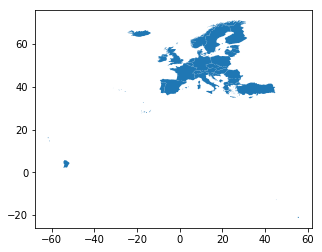

In [40]:
%matplotlib inline
gdf.plot()